In [2]:
# Install modules
! pip install openpyxl
! pip install xlsxwriter

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached XlsxWriter-3.0.3-py3-none-any.whl (149 kB)


In [3]:
# Lots of import statements
import timeit
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import openpyxl
import xlsxwriter
from itertools import combinations, groupby

import networkx as nx
import numpy as np
import plotly.graph_objects as go
import matplotlib as mpl
import pandas as pd
from IPython.display import clear_output
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM
from time import time
from copy import copy
from typing import List
# from qcgrader.graph_util import display_maxcut_widget, QAOA_widget, graphs
import qc_grader as qc
from qiskit.circuit import Parameter, ParameterVector
from qiskit_optimization import QuadraticProgram
plt.rcParams['figure.dpi'] = 300

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[[0.   1.15 1.   1.   1.15 1.15 1.15 1.   1.15 1.15 1.15 1.  ]
 [1.15 0.   0.   0.   1.15 1.15 1.15 0.   1.15 1.15 1.15 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.15 1.15 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.05
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 8.05
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 17.8
case = [0, 0, 1, 0,

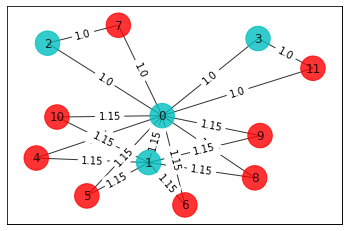

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generating a graph of 12 nodes

n=12 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[ 

    (0,1,1.15), 

    (0,2,1.0), 

    (0,3,1.0), 

    (0,4,1.15), 

    (0,5,1.15), 

    (0,6,1.15), 

    (0,7,1.0), 

    (0,8,1.15), 

    (0,9,1.15), 

    (0,10,1.15), 

    (0,11,1.0), 

    (1,0,1.15), 

    (1,4,1.15), 

    (1,5,1.15), 

    (1,6,1.15), 

    (1,8,1.15), 

    (1,9,1.15), 

    (1,10,1.15), 

    (2,0,1.0), 

    (2,7,1.0), 

    (3,0,1.0), 

    (3,11,1.0), 

    (4,0,1.15), 

    (4,1,1.15), 

    (5,0,1.15), 

    (5,1,1.15), 

    (6,0,1.15), 

    (6,1,1.15), 

    (7,0,1.0), 

    (7,2,1.0), 

    (8,0,1.15), 

    (8,1,1.15), 

    (9,0,1.15), 

    (9,1,1.15), 

    (10,0,1.15), 

    (10,1,1.15), 

    (11,0,1.0), 

    (11,3,1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))

In [5]:
### Quantum Approximation Optimization Algorithm

In [6]:
# Testing
#!pip show qc_grader


	Quantum Approximate Optimization Algorithm (QAOA):
		Solution: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
		Max-cut cost: 17.8
		Time: 555.6112153530121 seconds



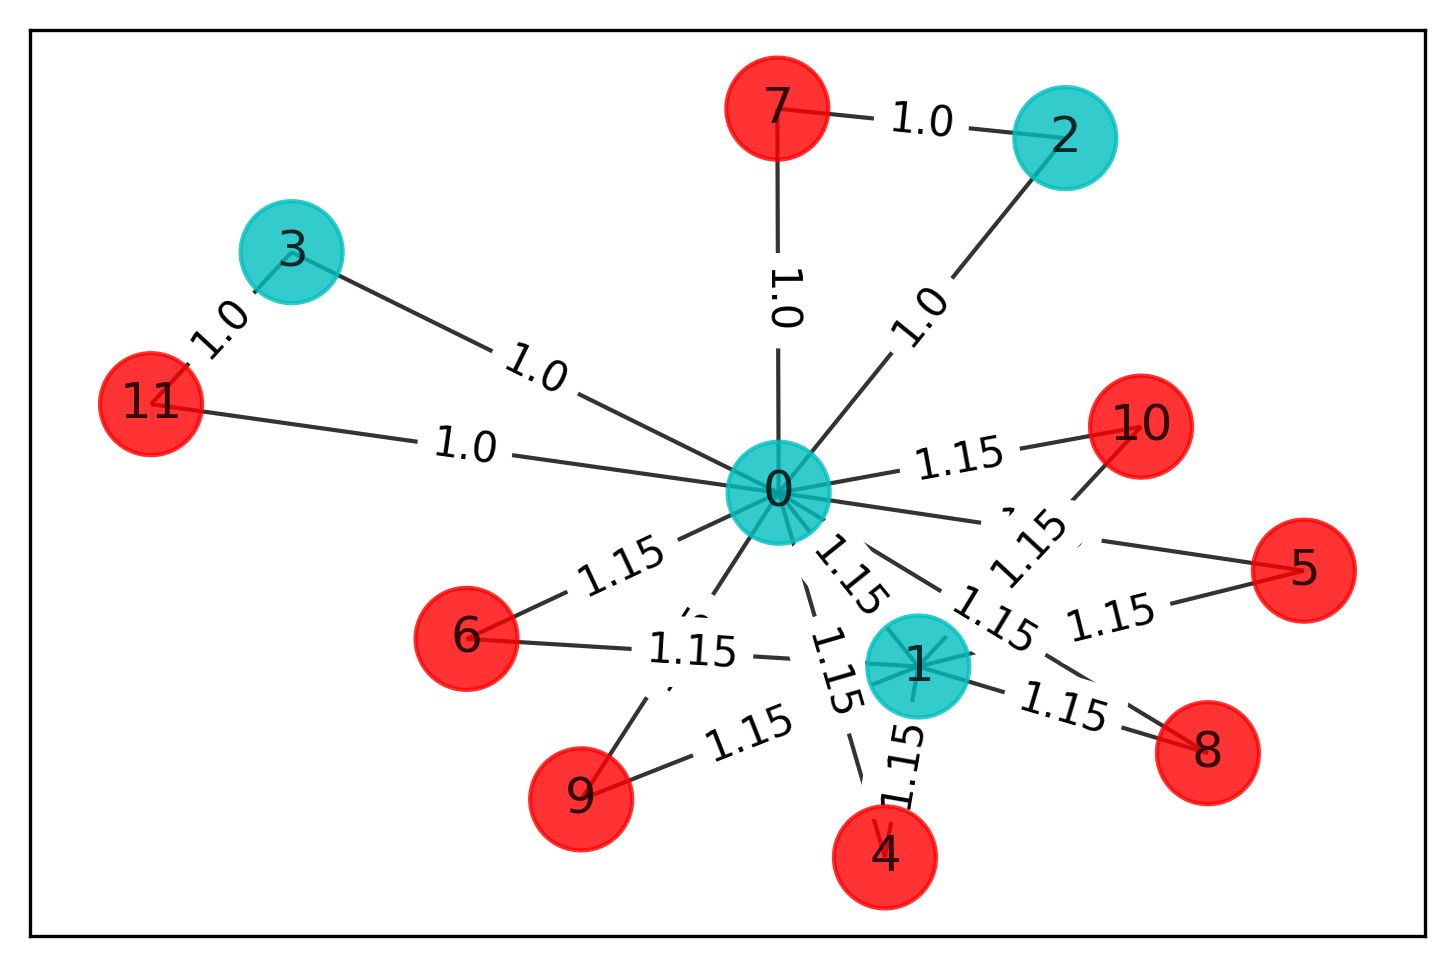

In [7]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go
import matplotlib as mpl
import pandas as pd
from IPython.display import clear_output
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM
from time import time
from copy import copy
from typing import List
import qc_grader as qc
from qiskit.circuit import Parameter, ParameterVector
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Maxcut, Tsp

def maxcut_cost_fn(graph: nx.Graph, bitstring: List[int]) -> float:
    """
    Computes the maxcut cost function value for a given graph and cut represented by some bitstring
    Args:
        graph: The graph to compute cut values for
        bitstring: A list of integer values '0' or '1' specifying a cut of the graph
    Returns:
        The value of the cut
    """
    #Get the weight matrix of the graph
    weight_matrix = nx.adjacency_matrix(graph).toarray()
    size = weight_matrix.shape[0]
    value = 0.
    for i in range(size):
        for j in range(size):
            value = value + weight_matrix[i][j] * bitstring[i] * (1-bitstring[j])

    return value

def quadratic_program_from_graph(graph: nx.Graph) -> QuadraticProgram:
    """Constructs a quadratic program from a given graph for a MaxCut problem instance.
    Args:
        graph: Underlying graph of the problem.
    Returns:
        QuadraticProgram
    """
    #Get weight matrix of graph
    weight_matrix = nx.adjacency_matrix(graph)
    shape = weight_matrix.shape
    size = shape[0]
    
    #Build qubo matrix Q from weight matrix W
    qubo_matrix = np.zeros((size, size))
    qubo_vector = np.zeros(size)
    for i in range(size):
        for j in range(size):
            qubo_matrix[i, j] -= weight_matrix[i, j]
    for i in range(size):
        for j in range(size):
            qubo_vector[i] += weight_matrix[i,j]

    quadratic_program = QuadraticProgram('MaxCut as QUBO')
    for i in range(size):
        quadratic_program.binary_var(name = f'x_{i}')

    quadratic_program.maximize(quadratic = qubo_matrix, linear = qubo_vector)
    
    return quadratic_program

def qaoa_circuit(qubo: QuadraticProgram, p: int = 1, params: dict = []) -> QuantumCircuit:
    """
    Given a QUBO instance and the number of layers p, constructs the corresponding parameterized QAOA circuit with p layers.
    Args:
        qubo: The quadratic program instance
        p: The number of layers in the QAOA circuit
    Returns:
        The parameterized QAOA circuit
    """
    size = len(qubo.variables)
    qubo_matrix = qubo.objective.quadratic.to_array(symmetric=True)
    qubo_linearity = qubo.objective.linear.to_array()

    #Prepare the quantum and classical registers
    qaoa_circuit = QuantumCircuit(size,size)
    #Apply the initial layer of Hadamard gates to all qubits
    qaoa_circuit.h(range(size))

    #Create the parameters to be used in the circuit
    if not params:
        gammas = ParameterVector('gamma', p)
        betas = ParameterVector('beta', p)
    else:
        gammas = [params[1]]
        betas = [params[0]]

    #Outer loop to create each layer
    for i in range(p):

        #Apply R_Z rotational gates from cost layer
        for qubit in range(size):
            sum =0
            for col in range(size):
                sum += qubo_matrix[qubit][col]
            theta = (qubo_linearity[qubit] + sum) * gammas[i]
            qaoa_circuit.rz(theta, qubit)

        #Apply R_ZZ rotational gates for entangled qubit rotations from cost layer
        for j in range(size):
            for k in range(size):
                if j != k:
                    theta = qubo_matrix[j][k] * gammas[i] / 2
                    qaoa_circuit.rzz(theta, j, k)

        # Apply single qubit X - rotations with angle 2*beta_i to all qubits
        for qubit in range(size):
            qaoa_circuit.rx(2 * betas[i], qubit)
    return qaoa_circuit

def plot_qaoa_energy_landscape(graph: nx.Graph, cvar: float = None, plot: bool = True):
    num_shots = 1000
    seed = 42
    simulator = Aer.get_backend('qasm_simulator')
    simulator.set_options(seed_simulator = 42)

    #Generate circuit
    circuit = qaoa_circuit(qubo = quadratic_program_from_graph(graph), p=1)
    circuit.measure(range(graph.number_of_nodes()),range(graph.number_of_nodes()))

    #Create dictionary with precomputed cut values for all bitstrings 
    cut_values = {}
    size = graph.number_of_nodes()
    for i in range(2**size):
        bitstr = '{:b}'.format(i).rjust(size, '0')[::-1]
        x = [int(bit) for bit in bitstr]
        cut_values[bitstr] = maxcut_cost_fn(graph, x)

    #Perform grid search over all parameters
    data_points = []
    max_energy = None
    for beta in np.linspace(0,np.pi, 50):
        for gamma in np.linspace(0, 4*np.pi, 50):
            bound_circuit = circuit.assign_parameters([beta, gamma])
            result = simulator.run(bound_circuit, shots = num_shots).result()
            statevector = result.get_counts(bound_circuit)
            energy = 0
            measured_cuts = []
            for bitstring, count in statevector.items():
                measured_cuts =  measured_cuts + [cut_values[bitstring]]*count

            if cvar is None:
                # Calculate the mean of all cut values
                energy = sum(measured_cuts)/num_shots
            else:
                alpha_n = cvar*num_shots
                measured_cuts.sort(reverse=True)
                energy = sum(measured_cuts[:int(alpha_n)])/alpha_n

            #Update optimal parameters
            if max_energy is None or energy > max_energy:
                max_energy = energy
                optimum = {'beta': beta, 'gamma': gamma, 'energy': energy}

            #Update data
            data_points.append({'beta': beta, 'gamma': gamma, 'energy': energy})

    if plot:
        #Create and display surface plot from data_points
        df = pd.DataFrame(data_points)
        df = df.pivot(index='beta', columns='gamma', values='energy')
        matrix = df.to_numpy()
        beta_values = df.index.tolist()
        gamma_values = df.columns.tolist()

        surface_plot = go.Surface(
            x=gamma_values, 
            y=beta_values,
            z=matrix,
            coloraxis = 'coloraxis'
        )
        fig = go.Figure(data = surface_plot)
        fig.show()

    #Return optimum
    return optimum

# Must pass in value for nx_g
def qaoa(nx_g):
    """
    Outline of how to use the QAOA class
        problem = QuadraticProgram()
        # specify problem here
        # specify minimum eigen solver to be used, e.g., QAOA
        qaoa = QAOA(...)
        optimizer = MinimumEigenOptimizer(qaoa)
        result = optimizer.solve(problem)
    
    """
    backend = Aer.get_backend('statevector_simulator')
    qaoa = QAOA(optimizer = ADAM(), quantum_instance = backend, reps=1, initial_point = [0.1,0.1])
    eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver = qaoa)
    quadratic_program = quadratic_program_from_graph(nx_g)
    result = eigen_optimizer.solve(quadratic_program)
    
    # print results
    bit_string = map(int, result.x)
    # We want to read and print out these values
    return bit_string, result.fval, result.min_eigen_solver_result.optimizer_time

# Run QAOA
# Need to pass proper nx.graph object into qaoa function instead of matrix
qaoa_bit, qaoa_result_cost, qaoa_result_time = qaoa(G)
#x = max_cut.sample_most_likely(result.eigenstate)

# Parse the bit string answer
qaoa_x = ', '.join(str(e) for e in qaoa_bit)
qaoa_x_inverse = ''
for x in qaoa_x:
    if x == '0':
        qaoa_x_inverse = qaoa_x_inverse + '1'
    elif x == '1':
        qaoa_x_inverse = qaoa_x_inverse + '0'
    else:
        qaoa_x_inverse = qaoa_x_inverse + x

# Print results
print('\n\tQuantum Approximate Optimization Algorithm (QAOA):')
print(f'\t\tSolution: [{qaoa_x}], [{qaoa_x_inverse}]')
print(f'\t\tMax-cut cost: {str(qaoa_result_cost)}')
print(f'\t\tTime: {str(qaoa_result_time)} seconds')
# print(f'\t\tCompmute Minimum Eigenvalue Time: {str(optimizer_time)} seconds.')
print()

# plot results
draw_graph(G, colors, pos)


In [18]:
### Variational Quantum EigenSolver

In [9]:
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer

def vqe(w):
    
    # Define our Qiskit Maxcut Instance
    max_cut = Maxcut(w)
    
    # Now Accounting for weights
    qp = quadratic_program_from_graph(graph)

    # Translate to Ising Hamiltonian
    qubitOp, offset = qp.to_ising()

    # Setup our simulator
    algorithm_globals.random_seed = 123
    seed = 10598
    backend = Aer.get_backend('aer_simulator_statevector')
    quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

    # Construct VQE
    spsa = SPSA(maxiter=300)
    cobyla = COBYLA(maxiter=300)
    ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
    vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

    # Run VQE
    result = vqe.compute_minimum_eigenvalue(qubitOp)
    # print results
    bit_string = list(max_cut.sample_most_likely(result.eigenstate))
    bit_string = map(int, bit_string)
    # print('energy:', result.eigenvalue.real)
    # print('time:', result.optimizer_time)
    # print('max-cut objective:', result.eigenvalue.real + offset)
    # print('solution:', bit_string)
    # print('solution objective:', qp.objective.evaluate(bit_string))
    
    return bit_string, (result.eigenvalue.real + offset), result.optimizer_time

## Tests

In [11]:
# Generate 1,000 graphs
qaoa_success = 0
vqe_success = 0
qaoa_failure = 0
vqe_failure = 0

# TODO: Change the number of tests, ad hoc
num_tests: int = 3

# Initialize list from 0 - num_tests for x axis of graph
x_axis = list(range(0, num_tests))

# Dict of execution times to graph
execution_times = {'QAOA' : [], 'VQE': [], 'BF': []}

# Dictionaries to store data for exporting to excel
qaoa_dict = {'solution': [], 'inverse solution': [], 'maxcut': [], 'exec time': [], 'nodes': []}
vqe_dict = {'solution': [], 'inverse solution': [], 'maxcut': [], 'exec time': [], 'nodes': []}
brute_dict = {'solution': [], 'inverse solution': [], 'maxcut': [], 'exec time': [], 'nodes': []}

# Main loop that runs the tests
for graph_id in range(num_tests):
    global bf_bit_string
    global bf_cost
    
    # Generate Random Graph
    graph, matrix = random_graph(n)
    
    # Computing the weight matrix from the random graph
    w = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            temp = graph.get_edge_data(i,j,default=0)
            if temp != 0:
                w[i,j] = temp['weight']
    
    print(f'\nTest Case {graph_id}: size = {n}')
    print('------------' + '-' * (len(str(graph_id)) * 2))
    print()
    print(w)
    
    # Brute Force Approach
    #
    # Time brute force algorithm
    bf_time: float = timeit.timeit(lambda: brute_force(graph, w), number=1)
    # Add execution time to dict for output to graph
    execution_times['BF'].append(bf_time)
    
    # Parse the bit sting answer
    bf_x = ''.join(str(e) for e in bf_bit_string)
    bf_x_inverse = ''.join('1' if x == '0' else '0' for x in bf_x)
    
    # Add results to dict for exporting
    brute_dict['solution'].append(bf_x)
    brute_dict['inverse solution'].append(bf_x_inverse)
    brute_dict['maxcut'].append(float(bf_cost))
    brute_dict['exec time'].append(bf_time)
    brute_dict['nodes'].append(n)
    
    # Print results
    print('\n\tBrute Force')
    print(f'\t\tSolution = {bf_x} [{bf_x_inverse}].')
    print(f'\t\tMaxcut = {str(bf_cost)}.')
    print(f'\t\tTime: {bf_time} seconds.')
    
    # QAOA Approach
    #
    # Run QAOA
    qaoa_bit_string, qaoa_cost, qaoa_optimizer_time = qaoa(graph)
    
    # Parse the bit sting answer
    qaoa_x = ''.join(str(e) for e in qaoa_bit_string)
    qaoa_x_inverse = ''.join('1' if x == '0' else '0' for x in qaoa_x)
    
    # Add execution time to list for output to graph
    execution_times['QAOA'].append(qaoa_optimizer_time)

    # Add results to dict for exporting
    qaoa_dict['solution'].append(qaoa_x)
    qaoa_dict['inverse solution'].append(qaoa_x_inverse)
    qaoa_dict['maxcut'].append(float(qaoa_cost))
    qaoa_dict['exec time'].append(qaoa_optimizer_time)
    qaoa_dict['nodes'].append(n)
    
    # Print results
    print('\n\tQuantum Approximation Optimization Algorithm (QAOA):')
    print(f'\t\tSolution = {qaoa_x} [{qaoa_x_inverse}].')
    print(f'\t\tMaxcut = {str(qaoa_cost)}.')
    print(f'\t\tOptimizer Time: {str(qaoa_optimizer_time)} seconds.')
    # print(f'\t\tCompmute Minimum Eigenvalue Time: {str(optimizer_time)} seconds.')
    
    # Check validity
    if bf_x == qaoa_x or bf_x == qaoa_x_inverse or qaoa_x == bf_x_inverse:
        qaoa_success += 1
        print('\n\t\tQAOA PASSED!')
    else:
        qaoa_failure += 1
        print('\n\t\tQAOA FAILED!')
    
    # VQE Approach
    #
    # Run VQE
    vqe_bit_string, vqe_cost, vqe_optimizer_time = vqe(graph)
    vqe_x = ''.join(str(e) for e in vqe_bit_string)
    vqe_x_inverse = ''.join('1' if x == '0' else '0' for x in vqe_x)
    
    # add results to dict for exporting
    vqe_dict['solution'].append(vqe_x)
    vqe_dict['inverse solution'].append(vqe_x_inverse)
    vqe_dict['maxcut'].append(float(vqe_cost))
    vqe_dict['exec time'].append(vqe_optimizer_time)
    vqe_dict['nodes'].append(n)
    
    # Print results
    print('\n\tVariational Quantum Eigensolver (VQE):')
    print(f'\t\tSolution = {vqe_x} [{vqe_x_inverse}].')
    print(f'\t\tMaxcut = {str(vqe_cost)}.')
    print(f'\t\tOptimizer Time: {str(vqe_optimizer_time)} seconds.')
    print()
    
    # Add execution time to list for output to graph
    execution_times['VQE'].append(vqe_optimizer_time)
        
    # Check validity
    if bf_x == vqe_x or bf_x == vqe_x_inverse or vqe_x == bf_x_inverse:
        vqe_success += 1
        print(f'\n\t\tVQE PASSED!')
    else:
        vqe_failure += 1
        print(f'\n\t\tVQE FAILED!') 
    
    # Increment size of graph
    n += 1
    

# Output results
print(f"""
---------------------------------------------------------
Test Results:
---------------------------------------------------------
qaoa_success = {qaoa_success} / {num_tests} * 100 = {qaoa_success / num_tests * 100}%
qaoa_failure = {qaoa_failure} / {num_tests} * 100 = {qaoa_failure / num_tests * 100}%
vqe_success = {vqe_success} / {num_tests} * 100 = {vqe_success / num_tests * 100}%
vqe_failure ={vqe_failure} / {num_tests} * 100 = {vqe_failure / num_tests * 100}%
""")

# Graph of Execution Times
plt.plot(x_axis, execution_times['BF'], label = "Brute Force")
plt.plot(x_axis, execution_times['QAOA'], label = "QAOA")
plt.plot(x_axis, execution_times['VQE'], label = "VQE")
plt.xlabel("Number of Tests")
plt.ylabel("Execution Times (Seconds)")
plt.legend()
plt.savefig("all.png")
plt.show()

# Graph of brute force execution times
plt.plot(x_axis, execution_times['BF'], label = "Brute Force")
plt.xlabel("Number of Tests")
plt.ylabel("Execution Times (Seconds)")
plt.legend()
plt.savefig('brute.png')
plt.show()

# Graph of QAOA execution times
plt.plot(x_axis, execution_times['QAOA'], label = "QAOA")
plt.xlabel("Number of Tests")
plt.ylabel("Execution Times (Seconds)")
plt.legend()
plt.savefig('qaoa.png')
plt.show()

# Graph of VQE execution times
plt.plot(x_axis, execution_times['VQE'], label ="VQE")
plt.xlabel("Number of Tests")
plt.ylabel("Execution Times (Seconds)")
plt.legend()
plt.savefig('vqe.png')
plt.show()

# Export the results to excel spreadsheet
# Initialize the dataframes
qaoa_df = pd.DataFrame.from_dict(qaoa_dict)
vqe_df = pd.DataFrame.from_dict(vqe_dict)
brute_df = pd.DataFrame.from_dict(brute_dict)
all_df = pd.DataFrame({})

writer = pd.ExcelWriter('10 node output.xlsx', engine = 'xlsxwriter')

# Write to excel spreadsheet
brute_df.to_excel(writer, sheet_name='Brute Force')
qaoa_df.to_excel(writer, sheet_name='QAOA')
vqe_df.to_excel(writer, sheet_name='VQE')
all_df.to_excel(writer, sheet_name='All')

# Export the graphs to excel sheet
ws_brute = writer.sheets['Brute Force']
ws_brute.insert_image('H1', 'brute.png')

ws_qaoa = writer.sheets['QAOA']
ws_qaoa.insert_image('H1', 'qaoa.png')

ws_vqe = writer.sheets['VQE']
ws_vqe.insert_image('H1', 'vqe.png')

ws_all = writer.sheets['All']
ws_all.insert_image('A1', 'all.png')


writer.save()

Traceback (most recent call last):
  Input In [11] in <cell line: 22>
    graph, matrix = random_graph(n)
NameError: name 'random_graph' is not defined

Use %tb to get the full traceback.


In [ ]:
# 7/27 It all runs now after I installed some packages and changed some import statements